In [9]:
import pandas as pd

# load csv to dataframes for the data/ut_contaienr_data/power_meter_202405221209.csv

file_path = 'data/ut_contaienr_data/power_meter_202405221209.csv'
df = pd.read_csv(file_path)
df.columns


Index(['id', 'timestamp', 'active_energy_import', 'active_energy_export',
       'reactive_energy_import', 'reactive_energy_export', 'current_l1',
       'current_l2', 'current_l3', 'active_power', 'active_power_l1',
       'active_power_l2', 'active_power_l3', 'grid_frequency', 'voltage_l1',
       'voltage_l2', 'voltage_l3'],
      dtype='object')

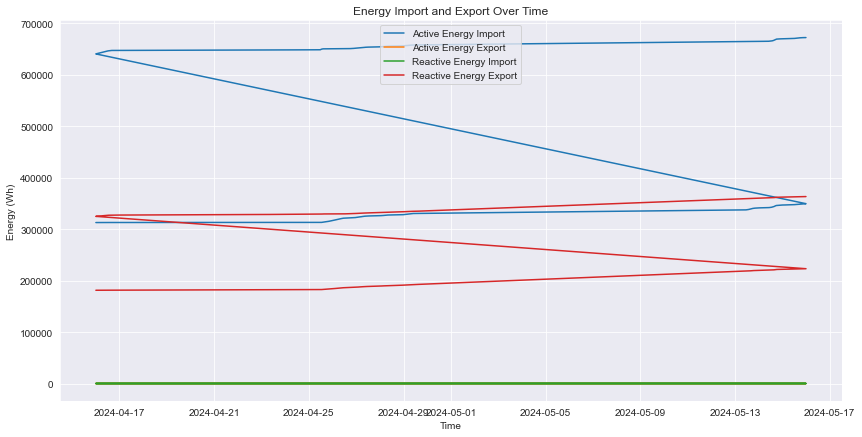

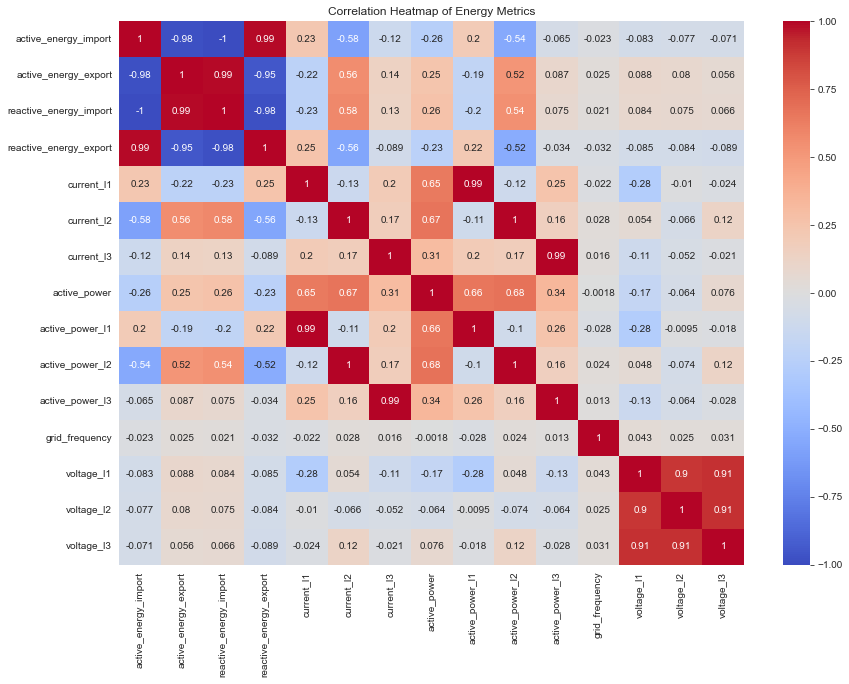

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data into a DataFrame
file_path = 'data/ut_contaienr_data/power_meter_202405221209.csv'
df = pd.read_csv(file_path)

# Convert the 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop rows with NaT in 'timestamp' column
df = df.dropna(subset=['timestamp'])

# Set the timestamp column as the index
df.set_index('timestamp', inplace=True)

# Convert relevant columns to numpy arrays for plotting
time_values = df.index.to_numpy()
active_energy_import_values = df['active_energy_import'].to_numpy()
active_energy_export_values = df['active_energy_export'].to_numpy()
reactive_energy_import_values = df['reactive_energy_import'].to_numpy()
reactive_energy_export_values = df['reactive_energy_export'].to_numpy()
voltage_l1_values = df['voltage_l1'].dropna().to_numpy()
voltage_l2_values = df['voltage_l2'].dropna().to_numpy()
voltage_l3_values = df['voltage_l3'].dropna().to_numpy()

# Time Series Plot: Active and Reactive Energy
plt.figure(figsize=(14, 7))
plt.plot(time_values, active_energy_import_values, label='Active Energy Import')
plt.plot(time_values, active_energy_export_values, label='Active Energy Export')
plt.plot(time_values, reactive_energy_import_values, label='Reactive Energy Import')
plt.plot(time_values, reactive_energy_export_values, label='Reactive Energy Export')
plt.title('Energy Import and Export Over Time')
plt.xlabel('Time')
plt.ylabel('Energy (Wh)')
plt.legend()
plt.grid(True)
plt.show()

plt.show()

# Correlation Heatmap: To see the correlation between different metrics
plt.figure(figsize=(14, 10))
correlation_matrix = df[['active_energy_import', 'active_energy_export', 'reactive_energy_import', 'reactive_energy_export', 'current_l1', 'current_l2', 'current_l3', 'active_power', 'active_power_l1', 'active_power_l2', 'active_power_l3', 'grid_frequency', 'voltage_l1', 'voltage_l2', 'voltage_l3']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Energy Metrics')
plt.show()


# Corellation between power and usage

C:\Users\david\AppData\Local\Temp\ipykernel_35416\4101133710.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_env['motion'] = df_env['motion'].fillna(False).astype(int)
C:\Users\david\AppData\Local\Temp\ipykernel_35416\4101133710.py:45: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_env = df_env.resample('15T').agg({
C:\Users\david\AppData\Local\Temp\ipykernel_35416\4101133710.py:57: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_power = df_power.resample('15T').agg({


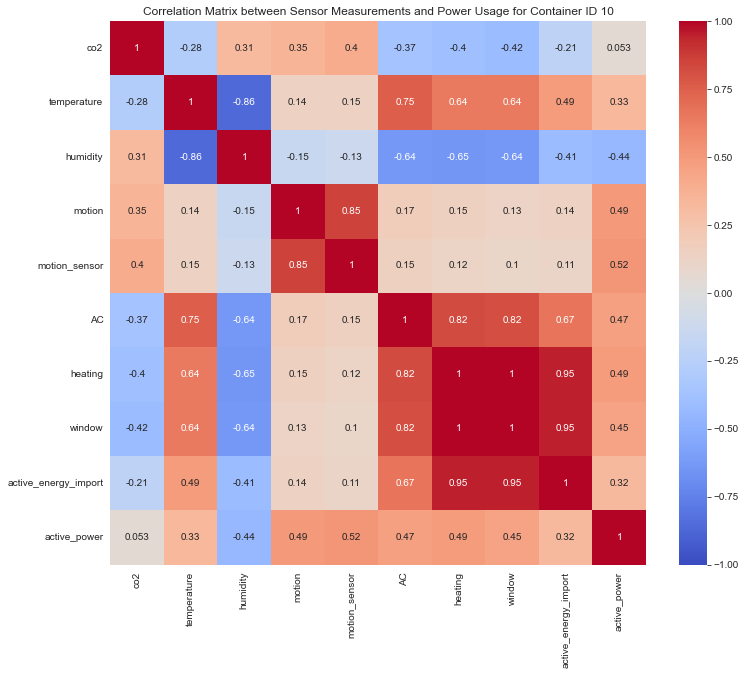

                           co2  temperature  humidity    motion  \
co2                   1.000000    -0.278112  0.312507  0.351629   
temperature          -0.278112     1.000000 -0.862743  0.140211   
humidity              0.312507    -0.862743  1.000000 -0.151914   
motion                0.351629     0.140211 -0.151914  1.000000   
motion_sensor         0.399577     0.145618 -0.131685  0.853544   
AC                   -0.365012     0.753232 -0.635952  0.172313   
heating              -0.397148     0.644069 -0.645386  0.154260   
window               -0.419396     0.642574 -0.635439  0.131257   
active_energy_import -0.212339     0.486581 -0.414938  0.137068   
active_power          0.053355     0.332438 -0.444880  0.492839   

                      motion_sensor        AC   heating    window  \
co2                        0.399577 -0.365012 -0.397148 -0.419396   
temperature                0.145618  0.753232  0.644069  0.642574   
humidity                  -0.131685 -0.635952 -0.645386

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the environment CSV data into a DataFrame
env_file_path = 'data/ut_contaienr_data/environment_202405221219.csv'  # Update this path
df_env = pd.read_csv(env_file_path)

# Load the power CSV data into a DataFrame
power_file_path = 'data/ut_contaienr_data/power_meter_202405221209.csv'  # Update this path
df_power = pd.read_csv(power_file_path)

# Convert the 'timestamp' columns to datetime
df_env['timestamp'] = pd.to_datetime(df_env['timestamp'], errors='coerce')
df_power['timestamp'] = pd.to_datetime(df_power['timestamp'], errors='coerce')

# Drop rows with NaT in 'timestamp' columns
df_env = df_env.dropna(subset=['timestamp'])
df_power = df_power.dropna(subset=['timestamp'])

# Set the timestamp columns as the index
df_env.set_index('timestamp', inplace=True)
df_power.set_index('timestamp', inplace=True)

# Ensure the index is of type DatetimeIndex
df_env.index = pd.to_datetime(df_env.index)
df_power.index = pd.to_datetime(df_power.index)

# Fill NaN values in 'motion', 'controller_output_0', 'controller_output_1', 'controller_input_1', and 'controller_input_0' columns with False and convert to int
df_env['motion'] = df_env['motion'].fillna(False).astype(int)
df_env['controller_input_1'] = df_env['controller_input_1'].fillna(False).astype(int)  # Motion sensor
df_env['controller_output_0'] = df_env['controller_output_0'].fillna(False).astype(int)  # AC status
df_env['controller_output_1'] = df_env['controller_output_1'].fillna(False).astype(int)  # Heating status
df_env['controller_input_0'] = df_env['controller_input_0'].fillna(False).astype(int)  # Window sensor

# Rename the columns accordingly
df_env.rename(columns={
    'controller_input_1': 'motion_sensor',
    'controller_output_0': 'AC',
    'controller_output_1': 'heating',
    'controller_input_0': 'window'
}, inplace=True)

# Resample the environment data to 15-minute intervals and aggregate
resampled_env = df_env.resample('15T').agg({
    'co2': 'mean',
    'temperature': 'mean',
    'humidity': 'mean',
    'motion': 'sum',
    'motion_sensor': 'sum',
    'AC': 'sum',
    'heating': 'sum',
    'window': 'sum'  # Window state
})

# Resample the power data to 15-minute intervals and aggregate
resampled_power = df_power.resample('15T').agg({
    'active_energy_import': 'sum',
    'active_power': 'mean'
})

# Merge the environment and power dataframes on the timestamp
merged_df = pd.merge(resampled_env, resampled_power, left_index=True, right_index=True, how='inner')

# Create a correlation matrix
correlation_matrix = merged_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Sensor Measurements and Power Usage for Container ID 10')
plt.show()

# Display the correlation matrix
print(correlation_matrix)


# How much energy consumption can be reduced using temperature sensors to HVAC?

1. Baseline Energy Consumption Analysis
First, we'll analyze the existing data to understand the baseline energy consumption when the HVAC is not controlled by temperature sensors.

2. Modeling Temperature-Controlled HVAC
Develop a model to simulate how the HVAC system would behave if controlled by temperature sensors. This involves creating a control strategy that turns the HVAC on or off based on temperature thresholds.

3. Comparison and Analysis
Compare the energy consumption in both scenarios to estimate potential energy savings.

In [2]:
import pandas as pd

# Load the environment CSV data into a DataFrame
env_file_path = 'data/ut_contaienr_data/environment_202405221219.csv'  # Update this path
df_env = pd.read_csv(env_file_path)

# Load the power CSV data into a DataFrame
power_file_path = 'data/ut_contaienr_data/power_meter_202405221209.csv'  # Update this path
df_power = pd.read_csv(power_file_path)

# Convert the 'timestamp' columns to datetime
df_env['timestamp'] = pd.to_datetime(df_env['timestamp'], errors='coerce')
df_power['timestamp'] = pd.to_datetime(df_power['timestamp'], errors='coerce')

# Filter both dataframes for container ID 10
df_env = df_env[df_env['id'] == 10]
df_power = df_power[df_power['id'] == 10]

# Drop rows with NaT in 'timestamp' columns
df_env = df_env.dropna(subset=['timestamp'])
df_power = df_power.dropna(subset=['timestamp'])

# Set the timestamp columns as the index
df_env.set_index('timestamp', inplace=True)
df_power.set_index('timestamp', inplace=True)

# Ensure the index is of type DatetimeIndex
df_env.index = pd.to_datetime(df_env.index)
df_power.index = pd.to_datetime(df_power.index)

# Fill NaN values in 'motion', 'controller_output_0', 'controller_output_1', and 'controller_input_1' columns with False and convert to int
df_env['motion'] = df_env['motion'].fillna(False).astype(int)
df_env['controller_input_1'] = df_env['controller_input_1'].fillna(False).astype(int)  # Motion sensor
df_env['controller_output_0'] = df_env['controller_output_0'].fillna(False).astype(int)  # AC status
df_env['controller_output_1'] = df_env['controller_output_1'].fillna(False).astype(int)  # Heating status

# Rename the columns accordingly
df_env.rename(columns={
    'controller_input_1': 'motion_sensor',
    'controller_output_0': 'AC',
    'controller_output_1': 'heating'
}, inplace=True)

# Resample the environment data to 15-minute intervals and aggregate
resampled_env = df_env.resample('15min').agg({
    'co2': 'mean',
    'temperature': 'mean',
    'humidity': 'mean',
    'motion': 'sum',
    'motion_sensor': 'sum',
    'AC': 'sum',
    'heating': 'sum'
})

# Resample the power data to 15-minute intervals and aggregate
resampled_power = df_power.resample('15min').agg({
    'active_energy_import': 'sum',
    'active_power': 'mean'
})

# Merge the environment and power dataframes on the timestamp
merged_df = pd.merge(resampled_env, resampled_power, left_index=True, right_index=True, how='inner')

# Calculate baseline energy consumption (in watt-hours)
baseline_energy_consumption = (merged_df['active_power'] * 15 / 60).sum()  # Convert power (W) to energy (Wh)
print(f"Baseline Energy Consumption (Wh): {baseline_energy_consumption}")


Baseline Energy Consumption (Wh): 29320.541666666664


C:\Users\david\AppData\Local\Temp\ipykernel_35416\183047961.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_env['motion'] = df_env['motion'].fillna(False).astype(int)


Step 2: Modeling Temperature-Controlled HVAC
Simulate a simple temperature control strategy and estimate the energy consumption.

In [17]:
# Define temperature thresholds
upper_threshold = 25  # Upper threshold for AC
lower_threshold = 18  # Lower threshold for heating

# Simulate HVAC control based on temperature
merged_df['AC_controlled'] = merged_df['temperature'].apply(lambda x: 1 if x > upper_threshold else 0)
merged_df['heating_controlled'] = merged_df['temperature'].apply(lambda x: 1 if x < lower_threshold else 0)

# Assume some average power usage for AC and heating
average_ac_power = 2000  # in watts
average_heating_power = 1500  # in watts

# Calculate energy consumption based on controlled HVAC
merged_df['AC_energy'] = merged_df['AC_controlled'] * average_ac_power * 15 / 60  # convert to Wh
merged_df['heating_energy'] = merged_df['heating_controlled'] * average_heating_power * 15 / 60  # convert to Wh

# Calculate total controlled energy consumption
total_controlled_energy = merged_df['AC_energy'].sum() + merged_df['heating_energy'].sum()
print(f"Total Controlled Energy Consumption (Wh): {total_controlled_energy}")


Total Controlled Energy Consumption (Wh): 74250.0


In [18]:
# Calculate potential energy savings
energy_savings = baseline_energy_consumption - total_controlled_energy
percentage_savings = (energy_savings / baseline_energy_consumption) * 100

print(f"Energy Savings (Wh): {energy_savings}")
print(f"Percentage Energy Savings: {percentage_savings:.2f}%")


Energy Savings (Wh): -44929.458333333336
Percentage Energy Savings: -153.24%


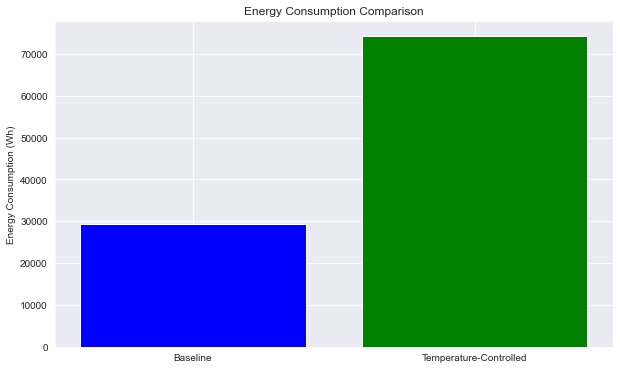

In [19]:
import matplotlib.pyplot as plt

# Plot energy consumption comparison
labels = ['Baseline', 'Temperature-Controlled']
energy_values = [baseline_energy_consumption, total_controlled_energy]

plt.figure(figsize=(10, 6))
plt.bar(labels, energy_values, color=['blue', 'green'])
plt.title('Energy Consumption Comparison')
plt.ylabel('Energy Consumption (Wh)')
plt.show()
